# Import Packages

In [25]:
from PIL import Image, ImageFilter

import os
import random
import numpy as np
import matplotlib.pyplot as plt

# Load Images(Data)

In [ ]:
def get_targets_and_image_dirs(dir):
    '''
    input
        dir : 이미지를 불러올 가장 상위 폴더의 경로를 입력합니다.
    ===================================================================
    return
        targets : 추후 label로 사용될 인물들의 명칭을 담은 리스트를 반환합니다.
        image_dirs : {label:key image_dir:value} 로 이뤄진 dictionary를 반환합니다.
    '''

    # 성별 폴더를 가져옵니다. (Male, Female)
    gender_folders = os.listdir(dir)
    
    # 각 성별의 인물 폴더를 담을 리스트(targets)와 이미지 경로가 담길 dictionary(image_dirs)를 선언합니다.
    targets, image_dirs = [], {}
    
    # 성별 폴더를 확인하면서, 각 폴더에 담긴 인물들의 리스트를 가져옵니다.
    for gender in gender_folders:
    
        # 현재 경로에 대한 정보를 변수에 담아둡니다.
        target_root = os.path.join(dir, gender)

        # target_folders에 찾은 인물들의 리스트를 담아둡니다.
        target_folders = os.listdir(target_root)

        # target 폴더별로 확인하면서 각 폴더별로 있는 이미지의 파일명을 가져옵니다.
        for target in target_folders:

            # 현재 경로에 대한 정보를 변수에 담아둡니다.
            image_root = os.path.join(target_root, target)

            # image_names에 찾은 파일명들의 리스트를 담아둡니다.
            image_names = os.listdir(image_root)

            # image_dirs의 target key를 선언해줍니다.
            image_dirs[target] = []

            for image_name in image_names:
                # 이미지의 경로를 초기화합니다.
                image_dir = os.path.join(image_root, image_name)

                # return할 image_dirs폴더에 각 target에 맞는 이미지의 경로를 담아줍니다.
                image_dirs[target].append(image_dir)

        # 미리 생성한 targets에 인물들의 리스트를 함께 담아줍니다.
        targets.extend(target_folders)

    return targets, image_dirs


# 이미지 경로를 통해 실제 이미지를 불러오고, 해당 이미지에 맞는 label을 만들어서 반환합니다.
def load_images_and_set_labels(targets, image_dirs):
    '''
    input
        targets : 이미지에 맞는 label에 사용될 list를 입력합니다.
        image_dirs : 불러올 이미지의 경로가 담긴 list를 입력합니다.
    ===================================================================
    return
        images : image_dir로 불러온 np.ndarray타입의 이미지를 담은 리스트를 반환합니다.
        labels : images에 같은 index에 위치한 이미지의 labeld을 담은 리스트를 반환합니다.
    '''
    # load된 image를 담을 리스트와 대응하는 label을 담을 리스트를 선언합니다.
    images, labels = {}, []

    # target값을 image_dirs의 key로 활용합니다.
    for target in targets:
        images[target] = []

        # target을 key로하는 value들을 불러옵니다.
        for image_dir in image_dirs[target]:
            # 해당 이미지에 맞는 label을 추가합니다.
            labels.append(target)

            # Image 타입의 이미지를 불러옵니다. Type = PIL.Image
            image = Image.open(image_dir)

            # 이미지를 numpy.ndarray 타입으로 변경합니다.
            # np_image = np.array(image)

            # images에 image를 추가합니다.
            images[target].append(image)
            # images.append(np_image)

    return images, labels

In [ ]:
# 본폴더에 있는 data folder로 경로를 설정한다.
dir = os.path.join(os.getcwd(), 'data')

targets, image_dirs = get_targets_and_image_dirs(dir)
images, labels = load_images_and_set_labels(targets, image_dirs)

# Data Augmentation

In [55]:
class Image_Augmentation():
    # Crop 기능 수행
    def crop(self, image, size=(200, 200)):
        '''
        input
            image : process를 진행할 이미지를 입력합니다. Type는 PIL.Image 타입이어야 합니다.
            size : 이미지를 crop했을때 최종 사이즈를 입력합니다. default : (200, 200)
        ===================================================================
        return
            cropped_image : crop된 이미지를 Image Type 그대로 반환합니다.
        '''
        # 입력받은 이미지의 w, h 사이즈를 저장합니다.
        image_w, image_h = image.size

        # 사용자가 입력한 w, h 사이즈를 저장합니다.
        w, h = size

        # 원본 이미지에서 crop할 좌상단, 우하단 좌표를 연산합니다.
        w_rand = random.randint(0, abs(image_w - w))
        h_rand = random.randint(0, abs(image_h - h))

        # x0, y0 = 좌상단 좌표
        # x1, y1 = 우하단 좌표
        x0, y0, x1, y1 = w_rand, h_rand, w + w_rand, h + h_rand

        cropped_iamge = image.crop((x0, y0, x1, y1))

        return cropped_iamge

    # Flip 기능 수행
    def flip(self, image, vertical=True):
        '''
        input
            image : process를 진행할 이미지를 입력합니다. Type는 PIL.Image 타입이어야 합니다.
            vertical : 이미지를 flip했을때 수평적으로 flip할지 수직적으로 flip할지 입력합니다. default : True(수직적)
        ===================================================================
        return
            flipped_image : flipp된 이미지를 Image Type 그대로 반환합니다.
        '''
        # vertical이 True라면
        if vertical:
            # 수직을 기준으로 flip합니다.
            flipped_image = image.transpose(Image.FLIP_TOP_BOTTOM)
        # vertical이 False라면
        else:
            # 수평을 기준으로 flip합니다.
            flipped_image = image.transpose(Image.FLIP_LEFT_RIGHT)

        return flipped_image

    def gray_scale(self, image):
        '''
        input
            image : process를 진행할 이미지를 입력합니다. Type는 PIL.Image 타입이어야 합니다.
        ===================================================================
        return
            gray_image : gray scale로 변환된 이미지를 Image Type 그대로 반환합니다.
        '''

        # '1' = grayscale
        # 'RGB', 'RGBA', 'CMYK' 가 있음
        gray_image = image.convert('1')

        return gray_image

    # Blur 기능 수행
    def blur(self, image):
        '''
        input
            image : process를 진행할 이미지를 입력합니다. Type는 PIL.Image 타입이어야 합니다.
        ===================================================================
        return
            blur_image : blur 처리된 이미지를 Image Type 그대로 반환합니다.
        '''
        blur_image = image.filter(ImageFilter.BLUR)

        return blur_image

    # Rotate 기능 수행
    def rotate(self, image):
        '''
        input
            image : process를 진행할 이미지를 입력합니다. Type는 PIL.Image 타입이어야 합니다.
        ===================================================================
        return
            rotate_image : 각도가 변환된 이미지를 Image Type 그대로 반환합니다.
        '''
        rotate_image = image.rotate(random.randint(-30, 30))

        return rotate_image

    # 처리 후 이미지 확인 기능 수행
    def show_images(self, images, target, figsize=(20, 20)):
            
        # 만약 images의 길이가 16 미만일 경우 len(images)를 len_image에 담아줍니다.
        if len(images) > 16:
            len_image = 16
        else:
            len_image = len(images)

        fig = plt.figure(figsize=figsize)
        
        # 16개의 이미지를 하나하나 확인합니다.
        for i in range(len_image):
            image = images[i]
            
            # subplot을 4x4 사이즈의 행렬로 만들어 총 16개를 만들어줍니다.
            ax = fig.add_subplot(4, 4, i+1)

            # 이미지를 각 subplot에 그려둡니다.
            ax.imshow(image)

            # target을 title로 달아줍니다.
            ax.set_title(f"Target : {target}")

        fig.show()


In [56]:
augmentor = Image_Augmentation()

#augmentor.show_images(images['GongYu'], 'GongYu')

In [31]:

def show_image(image):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1)
    ax.imshow(image)
    fig.show()

image = images['GongYu'][0]

In [50]:
image.size

(201, 251)

C:\Users\kimda\AppData\Local\Temp/ipykernel_15404/2664920555.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


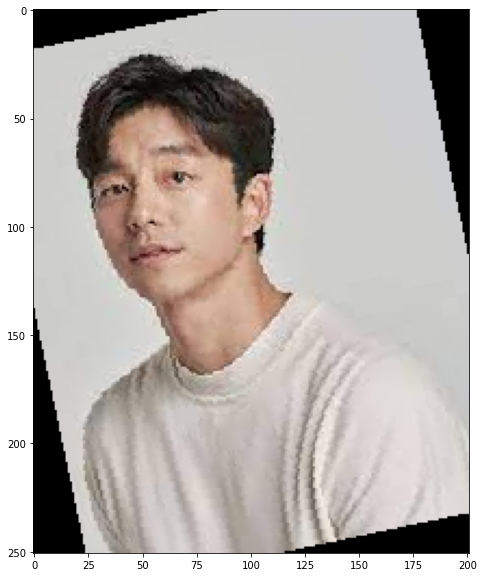

In [48]:
rotated_image = augmentor.rotate(image)
show_image(rotated_image)

C:\Users\kimda\AppData\Local\Temp/ipykernel_15404/2664920555.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


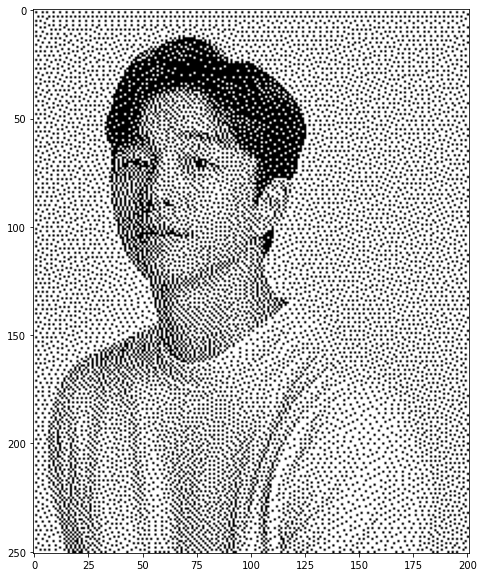

In [40]:
gray_image = augmentor.gray_scale(image)
show_image(gray_image)

C:\Users\kimda\AppData\Local\Temp/ipykernel_15404/2664920555.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


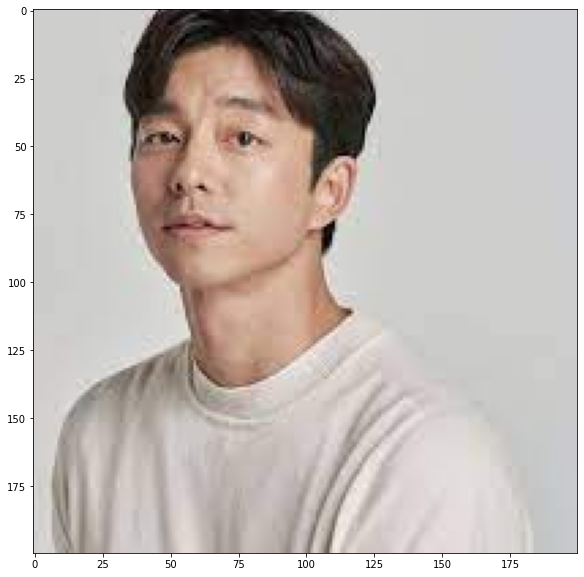

In [57]:
crop_image = augmentor.crop(image)
show_image(crop_image)

C:\Users\kimda\AppData\Local\Temp/ipykernel_15404/2664920555.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


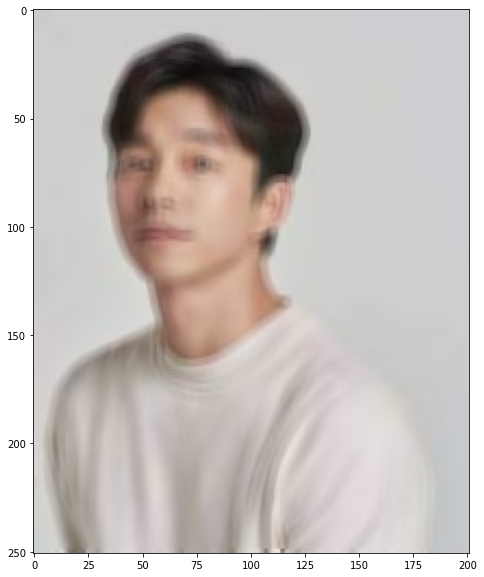

In [32]:
blur_image = augmentor.blur(image)
show_image(blur_image)

In [59]:
for target in set(targets):
    for image in images[target]:
        rotated_image = augmentor.rotate(image)
        images[target].append(rotated_image)

    augmentor.show_images(images[target][:16])

# Save Images(Data)

In [ ]:
def save_images(images, targets, save_dir):
    '''
    input
        images : 저장할 이미지를 담은 딕셔너리를 입력합니다.
        targets : 저장할 이미지의 클래스명이 담긴 리스트를 입력합니다.
        save_dir : 이미지를 저장할 가장 상위 폴더의 경로를 입력합니다.
    '''
    # 이미지를 저장할 폴더가 있는지 우선 확인합니다.
    for target in set(targets):
        # 저장할 경로에 대한 정보를 변수에 담아둡니다.
        save_folder_root = os.path.join(save_dir, target)

        # 저장할 폴더가 있으면 넘어가고 없으면 폴더를 생성합니다.
        make_folder(save_folder_root)

        # imagaes 딕셔너리에 해당하는 key에 담긴 image를 가져옵니다.
        for idx, image in enumerate(images[target]):
            image.save(save_folder_root + '/{0}.png'.format(idx))

def make_folder(path): 
    '''
    input
        path : 폴더 여부를 확인할 경로를 입력합니다.
    '''
    try:
        # path에 해당하는 경로에 폴더를 생성합니다.
        os.makedirs(path) 
    except OSError:
        # 폴더가 없었는데  OSError가 발생했다면 오류를 raise합니다.
        if not os.path.isdir(path): 
            raise

In [ ]:
print(type(images))

In [ ]:
save_images(images, targets, './data_')